# **Airline Pricing: Mergers, Hubs, and Distance Traveled**

**Kris Adler, Solly Kane, and Anthony Magliaca**

*Final Project for Data Bootcamp, Spring 2016, NYU Stern*


What dictates the price of an airplane ticket? As consumers, we know that many factors are involved including: days until the flight, day of the week of the flight, seats remaining, flight length, desirability of the flight time, and what airline is it on (just to name a few). Our project examines the effects of two different factors on pricing: airline mergers, and distance flown. While a more in-depth analysis in the future would look at many factors, and measure the effect of each on the price, our project is focused on the coding and presentation of data rather than the defensibility of the conclusions being reached.

In [22]:
import pandas as pd # data package
import numpy as np # foundation for Pandas 
import matplotlib.pyplot as plt  # graphics module 
import datetime as dt # date and time module
import matplotlib.dates as mdates #date plotting capabilities
import seaborn.apionly as sns #advanced vizualization package
from plotly.offline import iplot, iplot_mpl #enables plotly charts in offline notebook
import matplotlib.pyplot as plt # graphics
import plotly 
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go 

%matplotlib inline 
#iPython command that puts plots in this notebook

The data for this project comes from the U.S. Department of Transportation statistics available at the following site: https://www.transportation.gov/policy/aviation-policy/domestic-airline-consumer-airfare-report. Since the data comes in separate xlsx tables, we have combined 3 separate files into one dataframe below. 

In [7]:
df1 = pd.read_excel("https://www.transportation.gov/sites/dot.gov/files/docs/2006_2010_Table1.xlsx")
df2 = pd.read_excel("https://www.transportation.gov/sites/dot.gov/files/docs/2011_2014_Table1.xlsx")
df3 = pd.read_excel("https://www.transportation.gov/sites/dot.gov/files/docs/2015_Q4_Table1.xlsx")
airdata = pd.concat([df1, df2, df3]) #combines three excel files into one data frame
airlinedata2 = airdata.groupby(['city1','Year']).mean()['fare'].unstack(level='city1') #groups data by city1 and provides an average fare per city. 

Since the airline deregulation in 1978, the industry has experienced intense consolidation, as well as a shift to a hub-and-spoke model where airlines drive traffic through hub cities to minimize empty seats on unpopular flight routes. Hub cities also allow airline to become dominate players in a given market and have strong pricing power over their competitors. These factors have all contributed to price changes over time - in some cases driving prices up for consumers and in some cases driving prices down for consumers. 

Our first set of graphs focus on the effects of consolidation in the industry on pricing. Specifically, we are looking at the three major airline mergers of the last decade: Delta-Northwest, United-Continental, and American-US Airways. For each of these mergers we look at the primary hub city for the new airline (Atlanta for Delta, Chicago for United, and Dallas/Fort Worth for American) and examine the average price for all route pairs originating or terminating in the city. We also plotted a price adjusted for inflation line to show how price would have changed if it were linear (which we know is not true). 


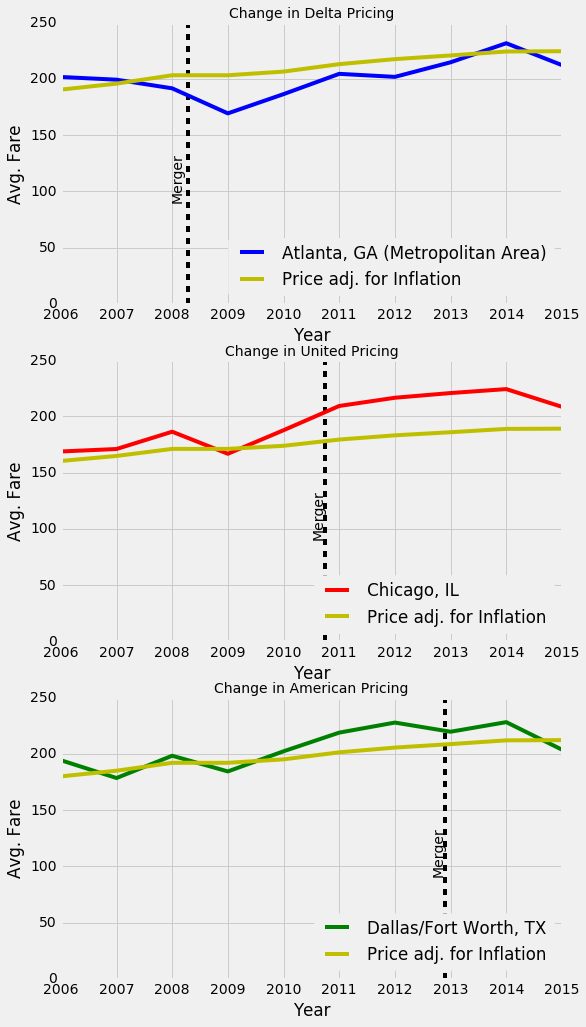

In [8]:
plt.style.use("fivethirtyeight")

inflation = [3.2, 2.8, 3.8, 0, 1.6, 3.2, 2.1, 1.5, 1.6, 0.1]

years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

deltapricewithinflation = []
inflation = [3.2, 2.8, 3.8, 0, 1.6, 3.2, 2.1, 1.5, 1.6, 0.1]
x=184.551405
for rates in inflation:
    x=(rates/100)*x+x
    deltapricewithinflation.append(x) #loop that adds inflation factor to Delta fare price over time
    
unitedpricewithinflation = []
inflation = [3.2, 2.8, 3.8, 0, 1.6, 3.2, 2.1, 1.5, 1.6, 0.1]
x=155.347547
for rates in inflation:
    x=(rates/100)*x+x
    unitedpricewithinflation.append(x) #loop that adds inflation factor to United fare price over time
    
americanpricewithinflation = []
inflation = [3.2, 2.8, 3.8, 0, 1.6, 3.2, 2.1, 1.5, 1.6, 0.1]
x=174.362472
for rates in inflation:
    x=(rates/100)*x+x
    americanpricewithinflation.append(x) #loop that adds inflation factor to American fare price over time

fig, (ax, ax2, ax3) = plt.subplots(3, sharey=True, figsize=(8,16)) 
airlinedata2['Atlanta, GA (Metropolitan Area)'].plot( #subplot of average fare in Delta hub city (Atlanta) over time against where we would expect the price to be by just adjusting for inflation to explore if the merger appeared to have any impact on the price.
           ax=ax,
           kind='line',
           color='blue',
           )
ax.set_xlabel('Year')
ax.set_ylabel('Avg. Fare')
ax.set_title('Change in Delta Pricing',fontsize=14, loc='center')
ax.set_xlim(2006.0,2015.0)
ax.vlines('2008.28',0,250, linestyles='dashed')
ax.text(.22, .5, 'Merger', rotation='vertical', transform=ax.transAxes)
ax.ticklabel_format(useOffset=False)
ax.plot(years,deltapricewithinflation, color='y', label='Price adj. for Inflation')
ax.legend(loc=4)
airlinedata2['Chicago, IL'].plot( #subplot of average fare in United hub city (Chicago) over time against where we would expect the price to be by just adjusting for inflation to explore if the merger appeared to have any impact on the price.
           ax=ax2,
           kind='line',
           color='red',
           )

ax2.set_xlabel('Year')
ax2.set_ylabel('Avg. Fare')
ax2.set_title('Change in United Pricing',fontsize=14, loc='center')
ax2.set_xlim(2006.0,2015.0)
ax2.vlines('2010.75',0,250, linestyles='dashed')
ax2.text(.5, .5, 'Merger', rotation='vertical', transform=ax2.transAxes)
ax2.ticklabel_format(useOffset=False)
ax2.plot(years,unitedpricewithinflation,label='Price adj. for Inflation', color='y')
ax2.legend(loc=4)
airlinedata2['Dallas/Fort Worth, TX'].plot( #subplot of average fare in American hub city (Dallas/Forth Worth) over time against where we would expect the price to be by just adjusting for inflation to explore if the merger appeared to have any impact on the price.
           ax=ax3,
           kind='line',
           color='green',
           )

ax3.set_xlabel('Year')
ax3.set_ylabel('Avg. Fare')
ax3.set_title('Change in American Pricing',fontsize=14, loc='center')
ax3.set_xlim(2006.0,2015.0)
ax3.vlines('2012.9',0,250, linestyles='dashed')
ax3.text(.74, .5, 'Merger', rotation='vertical', transform=ax3.transAxes)
ax3.ticklabel_format(useOffset=False)
ax3.plot(years,americanpricewithinflation, color='y', label='Price adj. for Inflation')
ax3.legend(loc=4)

Looking at the charts for the three major airlines it is hard to draw any definitive conclusions. However, a number of interesting observations emerge. First, the actual price increase in each city seems to follow a similar pattern over time – suggesting that the economy at-large has a more significant effect than the presence of the merger indicated on the graph. Second, the pricing in these hub cities is in line with the industry as a whole, that saw increases after the economic rebound but has actually seen prices drop in the last year with oil prices dropping. Finally, the fact Chicago and Dallas actual prices far outpace inflation but Atlanta lags behind is interesting and may be suggestive of the fact that while the Atlanta airport has a high flight volume it functions less as a “destination” and more as a necessary throughput than the others.

Our second graph compares airline fares with flight miles flown. While the airline industry has high fixed costs – namely airplanes – we would assume that longer flights have a higher fare to account for the variable costs of fuel, labor, and plane utilization time. Additionally, there is a higher substitution cost for consumers on longer routes that may allow airlines to charge a price premium.

In [20]:
ad = airdata
plt.style.use("fivethirtyeight")
data = [go.Histogram2dcontour(
        z=ad.city1, 
        x=ad.nsmiles, 
        y=ad.fare,
        hoverinfo ="x+y+ad['city1']"
    )] 
#heatmap or contoured histogram showing the relationship between average fare and distance of flight in miles.
layout = go.Layout(title='Fare and Distance by Market', xaxis=dict(title="Number of Miles"), yaxis=dict(title="Fare"))
fig_airlinedata = go.Figure(data=data, layout=layout)
iplot(fig_airlinedata)

Looking at the graph it seems to validate our hypothesis and there is in fact an upward trend in price as you move right along the x-axis in flight miles. What is very surprising so the large disparity in flight miles for around the $165 price range. Many flights varying from 250 miles all the way up to 1,700 miles and beyond can be purchased for almost identical prices. We think reflects the high fixed-costs of the business and the high competitiveness within many market pairs to keep prices just above marginal cost. 

That being said, the graph shows that there is some degree of variability of price at a given distance (shown by the top to bottom spread of data) – this suggests that other factors (time/date of flight, time to flight, etc) are at play here and that different routes of the similar distance lead to different prices.

One final point is that prices and distances flown appear to converge right around 450 miles and $155 dollars where many regional airlines like SouthWest have created thriving businesses taking advantage of this trend. 
